# Исследование успешности компьютерных игр

Исследование проводится для международного интернет-магазина компьютерных игр "Стримчик" на основе исторических данных о продажах игр, оценок пользователей и экспертов, жанры и платформы из открытых источников. 

**Цель исследования:**
выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и планирования рекламных кампаний.

**Дата исследования:** декабрь 2016, использованы данные до 2016 года для планирования кампании на 2017 год. Так как год не завершен, не все данные за 2016 год доступны.

**Ход исследования:**
Данные загружаются из датасета: ```/datasets/games.csv```. Поскольку качество данных неизвестно, сначала необходимо их изучить. В случае обнаружения ошибок и их влияния на исследование на этапе предобработки данных будет рассмотрены варианты исправления ошибок без искажения конечных результатов. Поскольку компьютерные игры - это быстроменяющаяся отрасль, в ходе исследовательноского анализа выделим актуальный период и на основе ограниченной выборки с наиболее актуальными тенднциями будем составлять портрет пользователя и проверять гипотезы.

<u>Исследование пройдет в 6 этапов:</u>
- [Обзор данных](#one)
- [Предобработка данных](#tw)
- [Исследовательский анализ данных](#thr)
- [Составление портрета пользователя по регионам](#fr)
- [Проверка гипотез](#fi)
- [Вывод](#six)

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id='one'></a>
## Обзор данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
#загружаем датасет
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
#выведем первые строки датасета 
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#изучим информацию о датасете
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.Name.nunique()

11559

In [6]:
#посмотрим наличие неявных дублей
games.Platform.sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [7]:
games.Genre.sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [8]:
games.Rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

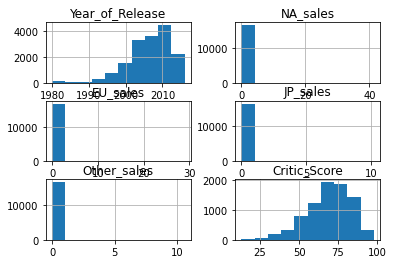

In [9]:
#рассмотрим распределение числовых данных
games.hist();

**Таким образом, наметим задачи, которые необходимо решить в дальнейшем:**
- Привести к стандартному виду названия столбцов датафрейма - без заглавных букв и пробелов
- Изменить тип данных в столбце c годом на целочисленное значение вместо типа данных object, а также изменим столбец с рейтингом от пользователей User_Score из object в вещественный тип данных
- Проверить на наличие дубликатов, так как строк в датасете более 16000, а уникальных значений по названиям игр меньше 12000, могут быть совпадения
- Определить количество пропусков в столбцах и оценить, какие можно исправить
- В данных о продажах есть значения, которые сильно превосходят большую часть данных - очень популярные игры, сумма продаж от которых многократно превосходят остальные значения.

<a id='tw'></a>
## Предобработка данных

In [10]:
#изменим регистр названий столбцов
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#определим количество пропусков в данных
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [12]:
#оценим долю пропусков
round(games.isna().mean()*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

**Причины пропусков в данных:**
Данные были получены из открытых источников, поэтому пропуски могли возникнуть в связи с :
1. отсутствием информации по конкретному полю (у игр нет оценок или за счет давности ее выпуска, малой популярности, по этой же причине в открытых источниках могла не сохраниться общая информация об игре, для игры не определили возрастную категорию или данная оценка была дана другой ассоциацией, а не ESRB)
2. сбоем при выгрузке или загрузке данных, которые привели к потере данных
3. тем, что программа сбора информации не обнаружила в открытых доступах нужную информацию
4. пропуски в названии игры могли появиться, если они были написаны символами, которые не конвертируются в латиницу алгоритмом, например, иероглифами 

**Заполнение пропусков:**
- Поскольку пропусков по названию и жанру 2 шт, предположим, что это информация по тем же играм, которую не удалось загрузить (проверим в дальнйшем) и которую можно удалить, если по ней обнаружится много пропусков и значения по цене существенно не повлияют.
- Год выпуска можно заполнить 0, поскольку данное значение не будет спутано с реальным и не повлияет на расчеты, при этом можно будет изменить тип данных на int 
- ESRB определяет рейтинг для Канады и США, то есть логично видеть большое наличие пропусков среди игр, так как их могли оценивать по рейтингам в других странах (в Европе, например, действует рейтинговая система Pan European Game Information (PEGI), в Японии - CERO, есть свои [системы и в других странах: Бразилии, России, Австралии и тд.](https://ru.wikipedia.org/wiki/%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD:%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B_%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%BE%D0%B2_%D0%B8%D0%B3%D1%80)), в рейтинге ESRB существует значение RP - «Rating Pending» — то есть рейтинг ожидается, так как игра была отправлена в ESRB и ожидает присвоения рейтинга, заменим NaN на  ND - not defined, чтобы не соединять данные с RP. 
- Пропуски в оценке критиков и пользователей также можно заменить на значение 0, чтобы указать на отсутствие рейтинга, 0 как раз говорит об отсутствии оценки от пользователя или критика. 

**Замена типа данных:**
- в столбце с годом изменим тип данных на int, так как года представлены только в целых числах, это позволит оптимизировать хранение и восприятие данных
- значения оценки пользователей изменим на вещественный тип данных, поскольку вся оценка дана числовыми значениями с десятичными знаками, изначально тип данных был категориальным из-за значения tbd

**Значение tbd в столбце user_score:**

Данная аббревиатура означает to be determined, то есть, что оценка от пользователей еще не была поставлена, возможно, в силу того, что игра новая или очень старая, что не получила оценок из-за непопулярности или нераспростанненности какой-либо версии на определенных платформах или из-за отсутствия оценок от пользователей в открытом доступе. Заменим данное значение также на 0.

In [13]:
#заполним пропуски в годе выпуска
games['year_of_release'] = games['year_of_release'].fillna(0)
(games['year_of_release'] == 0).sum()

269

In [14]:
#изменим тип данных на целочисленный
games['year_of_release'] = games['year_of_release'].astype('int')

In [15]:
games.loc[games['year_of_release'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заметим, что в некоторых строках с пропущенным годом выпуска данное значение написано в названии. Однако год выпуска игры и год, указанный в названии, не всегда совпадает и может отличаться на один год. Так, например, игра FIFA Soccer 2004 была выпущена в 2003 году. Это же видно и по четвертой строке снизу в таблице выше, игра LMA Manager 2007 была выпущена в 2006 году. На данный момент не будем заменять нули в датафрейме, но будем иметь в виду, что существует возможность получить приблизительный год.

In [16]:
#заполним пропуски в оценке пользователей и заменим tbd, изменим тип данных
games['user_score'] = games['user_score'].fillna(0).replace('tbd', '0').astype('float')
games['user_score']

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

In [17]:
#проверим значения без названий
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


In [18]:
#удалим строки, в которых отсутствуют данные
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [19]:
games.name = games.name.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16709,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,NaN
16710,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16711,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [20]:
games.duplicated().sum()

0

In [21]:
#замена пропусков в рейтинге
games['rating'] = games['rating'].fillna('ND')

In [22]:
#замена пропусков в оценке критиков
games['critic_score'] = games['critic_score'].fillna(0)

In [23]:
#проверим внесенные изменения
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропуски корректно заменены, тип данных изменен.

In [24]:
#проверим наличие дубликатов
games.duplicated().sum()

0

In [25]:
#определим наиболее часто встречающиеся наименования 
games['name'].value_counts(ascending=False).head()

need for speed: most wanted    12
lego marvel super heroes        9
madden nfl 07                   9
ratatouille                     9
fifa 14                         9
Name: name, dtype: int64

In [26]:
games.loc[games['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Так, одинаковые названия игр в таблице обозначают те же игры, но на разных платформах или версии, выпущенные в разные года.

In [27]:
#создадим дополнительный столбец с суммой продаж по всем регионам
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,ND,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,ND,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16709,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,ND,0.01
16710,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16711,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,ND,0.01


**Вывод:**
- Были обработаны все пропуски - удалены 2 строки, в котороых практически не было информации, а также заменены пропуски на индикаторы, которые не будут учитываться при дальнейшем анализе, но позволили изменить тип данных.
- Был изменен тип данных в двух столбцах - столбцах с обозначением года и оценки пользователей - на численные, в последнем значения tbd, то есть "оценка не определена", был заменены также на 0.
- Дубликаты не были обнаружены.
- Названия столбцов были приведены к нижнему регистру.

<a id='thr'></a>
## Исследовательский анализ

### Год выпуска игры

Для проверки гипотез и анализа сначала необходимо определить, важны ли данные за все годы и по всем платформам, или же можно не учитывать некоторые из них, так как они устарели, особенно принимая во внимание динамичность развития отрасли компьютерных игр и быструю смену поколений игр и игровых платформ.

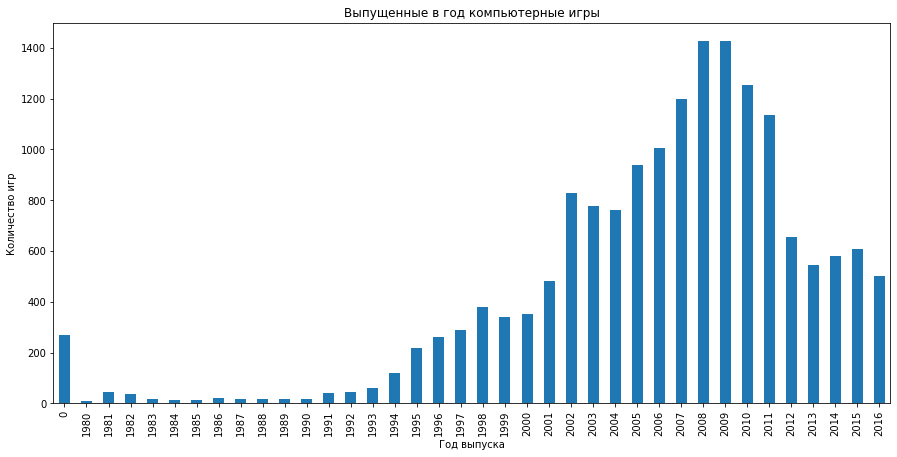

In [28]:
#визуализируем распределение игр по годам
games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15, 7), title='Выпущенные в год компьютерные игры')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show()

Количество выпускаемых игр отличалось в разные годы. Активное появление компьютерных игр началось в 2002 году и достигло пика в 2008-2009 году, с 2012 года количество стало сокращаться и вышло примерно на уровень 2002 года. Данное распределение можно объяснить следующей динамикой: малое количество игр в 1980-х соответствует началу развития индустрии компьютрных игр, распространения персональных компьютеров, созданию портативных консолей, в 1990-х появилась трехмерная графика и новые жанры игр, вместо дискет и картриджей стали использовать CD-ROM, позволившие увеличить объем данных игр. Так, отрасль развивалась и увеличивалась за счет увеличения количества платформ, жанров, возможностей графики и распространения технологий, что привелу к сильному росту количества и разнообразия компьютерных игр в 2000-х.  В этот же период стали появляться и утверждаться лидеры в индустрии: компании Sony(PlayStation), Nintendo(Gameboy, Wii, DS), Microsoft(Xbox), а также выпускаться франшизы. В начале 2010-х большее распространение получили сматрфоны и игры на них. Все это могло послужить снижению количества выпускаемых игр и достижению индустрией равновесного уровня выпуска игр. 

Монополисты отрасли производят новые поколения консолей и других платформ, модифицируют игры в соответствии с новыми технологическими возможностями, поэтому строить прогнозы и проверять гипотезы необходимо на базе выборки по актуальному периоду, а не всех данных.  В данном исследовании будем рассматривать период с момента снижения количества выпускаемых игр и до сегодняшнего дня, то есть **период 2012-2016 гг.**

In [29]:
#определим фильмы, по названию которых мы можем добавить год выпуска и которые соответствуют выделенному для анализа периоду
zero_year = games.loc[games['year_of_release'] == 0]
name = list(zero_year['name'])
names = []

for a in name:
    if '2012' in a or '2013' in a or '2014' in a or '2015' in a or '2016' in a or '2017' in a:
        names.append(a)
    else:
        continue

names

['tomb raider (2013)']

In [30]:
games[games['name'] == 'Tomb Raider (2013)']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [31]:
games.loc[5335, 'year_of_release'] = 2013
games[games['name'] == 'Tomb Raider (2013)']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Таким образом, из игр, в которых не был выделен год, удалось восстановить 1 значение. 

### Платформа для игр

In [32]:
#выведем, какое количество платформ и за какой период существовало, а также количество выпущенных для них игр
#создадим отдельный датафрейм без нулевых значений в годе выпуска
no_zero = games.loc[games['year_of_release'] != 0]
platforms = no_zero.pivot_table(index='platform', values='year_of_release', aggfunc=['count', 'min', 'max'])

In [33]:
#расчитаем период действия платформы
max_year = pd.Series(platforms[('max', 'year_of_release')])
min_year = pd.Series(platforms[('min', 'year_of_release')])

platforms['period'] = max_year - min_year + 1

In [34]:
platforms.columns =('Кол-во игр', 'Первый год выпуска игры', 'Последний год выпуска игры', 'Период работы платформы')
platforms

,Кол-во игр,Первый год выпуска игры,Последний год выпуска игры,Период работы платформы
platform,,,,
2600,116,1980,1989,10
3DO,3,1994,1995,2
3DS,512,2011,2016,6
DC,52,1998,2008,11
DS,2121,1985,2013,29
GB,97,1988,2001,14
GBA,811,2000,2007,8
GC,542,2001,2007,7
GEN,27,1990,1994,5


In [35]:
#определим среднее время существования платформы
print(platforms['Период работы платформы'].median())
platforms['Период работы платформы'].mean()

7.0


8.612903225806452

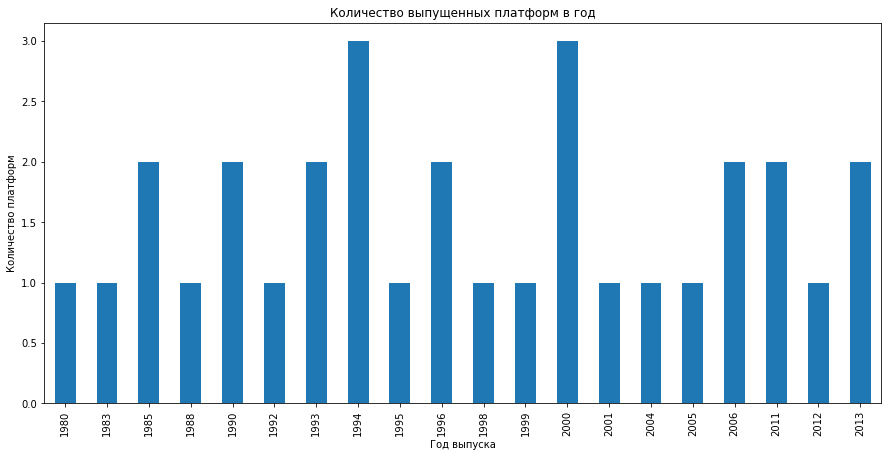

In [36]:
#визуализируем количество выпущенных платформ в год
platforms['Первый год выпуска игры'].value_counts().sort_index().plot(kind='bar', figsize=(15, 7), title='Количество выпущенных платформ в год')
plt.ylabel('Количество платформ')
plt.xlabel('Год выпуска')
plt.show()

In [37]:
print(platforms['Первый год выпуска игры'].value_counts().median())
platforms['Первый год выпуска игры'].value_counts().mean()

1.0


1.55

- Так, **средний срок жизни платформы равен около 7-9 лет**, хотя существуют и исключения: персональный компьютер является наиболее долго существующей платформой для игр и на данный момент продолжает быть популярным. 
- В среднем на игровом рынке появляется **1 новая платформа в год**, однако, не все платформы являюстя популярными и востребованными.
- К наиболее популярным платформам относятся консоли от монополистов индустрии: Nintendo, Sony и Microsoft, так как наибольшее число игр создается на платформы этих компаний, именно они имеют определяющее значение и по ним лучше определять срок сменяемости поколений консолей. Выпуск новых платформ зависит от таких факторов как появление новых технологий и совершенствование возможностей игровых приставок. Так, если рассмотреть сменяемость платформ PlayStation(PS), Xbox и Wii, то **средний срок выпуска новой платформы составляет около 6 лет**.
- На платформы выпускается неравное количество игр, они отличаются как по жанровому ряду, так и по количеству, соответственно и выручка от каждой платформы будет отличаться. Рассмотрим далее платформы с наибольшими суммарными продажами.

In [38]:
#проверим, есть ли среди игр для платформ последнего поколения те, для которых не определился год
games.loc[(games['year_of_release'] == 0) & ((games['platform'] == 'XOne') | (games['platform'] == 'WiiU') | (games['platform'] == 'PS4') | (games['platform'] == '3DS') | games['platform'] == 'PSV')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Таким образом, удаление данных, в которых не был определен год, не скажется на составлении портрета и проверке гипотез.

### Выручка от платформы

In [39]:
#определим платформы с наибольшими суммарными продажами
all_sales = no_zero.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').reset_index()
all_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [40]:
#выделим платформы с наибольшими суммарными продажами в отдельный список
rich = all_sales[all_sales['total_sales'] > 250]
rich_platforms = list(rich['platform'])
rich_platforms

['NES',
 'XB',
 'GB',
 'PC',
 '3DS',
 'PSP',
 'GBA',
 'PS4',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

In [41]:
#отфильтруем датафрейм по созданному выше списку
rich_games = no_zero.loc[no_zero['platform'].isin(rich_platforms)]
rich_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,ND,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,ND,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,woody woodpecker in crazy castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.0,0.0,ND,0.01
16707,score international baja 1000: the official game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,ND,0.00
16708,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16709,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,ND,0.01


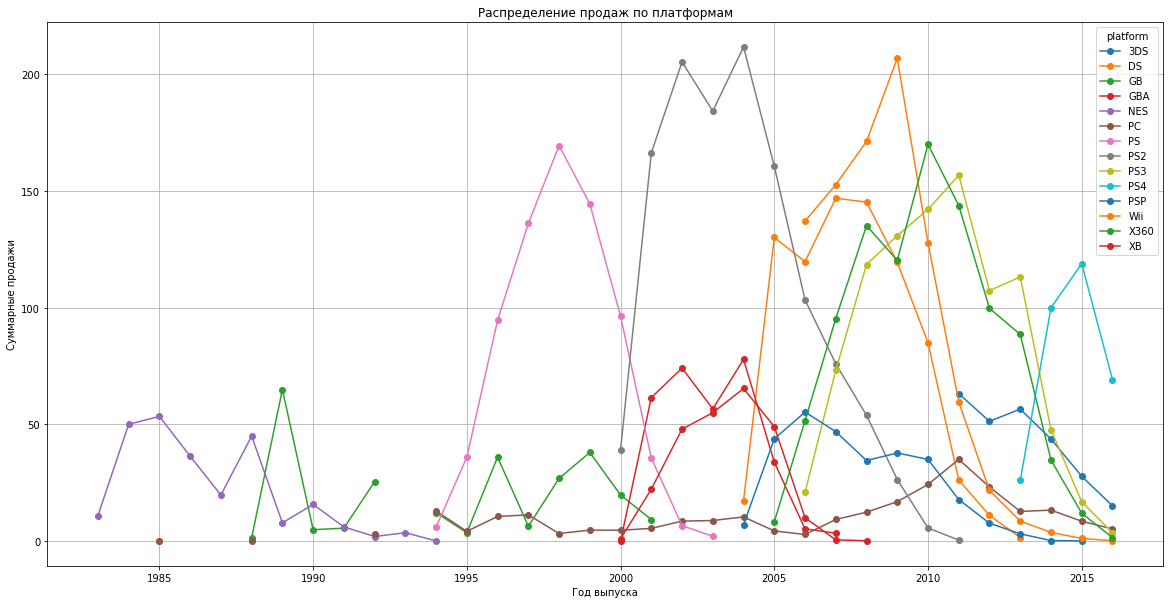

In [42]:
#
rich_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(20, 10), title='Распределение продаж по платформам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()
#.sort_values(by='total_sales')

- Основная тенденция в продажах игр на различных платформах состоит в следующем - игра постепенно (в некоторых случаях стремительно) достигает пика в продажах, после чего получаемая сумма начинает также постепенно падать с годами, иногда с небольшими пиками роста, но общей тенденцией на понижение доходности. Именно в период понижения, спустя 2-3 года после начала спада в продажах компании выпускают новое поколение платформ, которые стимулируют продажи и обеспечивают новый рост доходов.
- Исключением в данных платформах является PC - персональный компьютер, продажи игр на данную платформу относительно стабильны и не обладают такой вариативностью как в случае с играми для консолей.
- Так как цикл жизни игры около 8 лет, то примерно спустя 4-5 лет обычно наступает пик в продажах и начинается спад. **Для построения прогноза на следуюший год возьмем период равный предыдущим 5 годам (с 2012 по 2016 включительно).**

### Игры в актуальный период (2012-2016)

#### Глобальные продажи на платформах

In [43]:
#выделяем датафрейм 
new_games = games.query('year_of_release > 2011')
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,ND,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,ND,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16705,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16708,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16710,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01


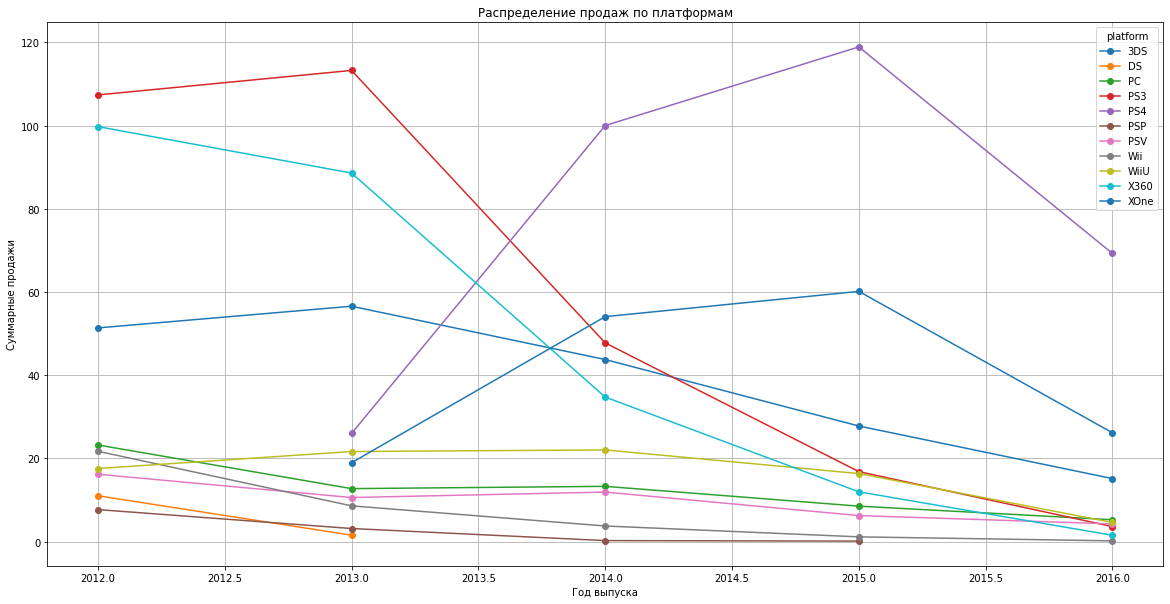

In [44]:
new_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(20, 10), title='Распределение продаж по платформам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Год выпуска')
plt.show()

*Платформы, которые лидируют по продажам:*
- На 2016 год по продажам лидируют PS4, XOne и 3DS, то есть консоли от компаний-лидеров в отрасли.
- В срезе всего рассматриваемого периода также по продажам лидируют X360 и PS3, то есть предыдущие поколения лидирующих на 2016 год консолей. Следующая за ними по продажам WiiU, то есть последнее поколение консолей от Nintendo.

*Платформы, которые растут в продажах и потенциально прибыльные платформы:*
- По существующим данным ни одна из платформ не указывает на рост в продажах.
- Поскольку данные за 2016 год неполные существует вероятность, что реальные цифры продаж окажутся выше, чем отраженные на графике, поскольку консоли PS4, XOne были выпущены лишь в 2013, значит, вполне вероятно, не достигли еще своего пика.
- Также потенциально больше продаж может быть и у игр для WiiU (выпущена в 2012).
- **Потенцально прибыльными платформами могут стать: PS4, XOne**, возможно, также WiiU и 3DS, но в меньшей степени.

*Платформы, которые падают в продажах:*
- Стабильно и резко падают в продажах игры для консолей предыдущих поколений, когда уже были выпущены новые версии - X360, PS3, Wii. 
- Примерно на одном уровне находятся продажи игр на ПК и PSV, хотя тенденция к понижению, спад является плавным. Такая тенденция продаж была характерна для компьютрных игр на ПК на протяжении десятилетий, однако, на данный момент появляется еще больше альтернатив данному виду видеоигр, поэтому тенденция к понижению продаж может сохраниться. PSV была выпущена лишь в 2011 году, уровень продаж, возможно, будет оставаться на том же уровне или сокращаться.

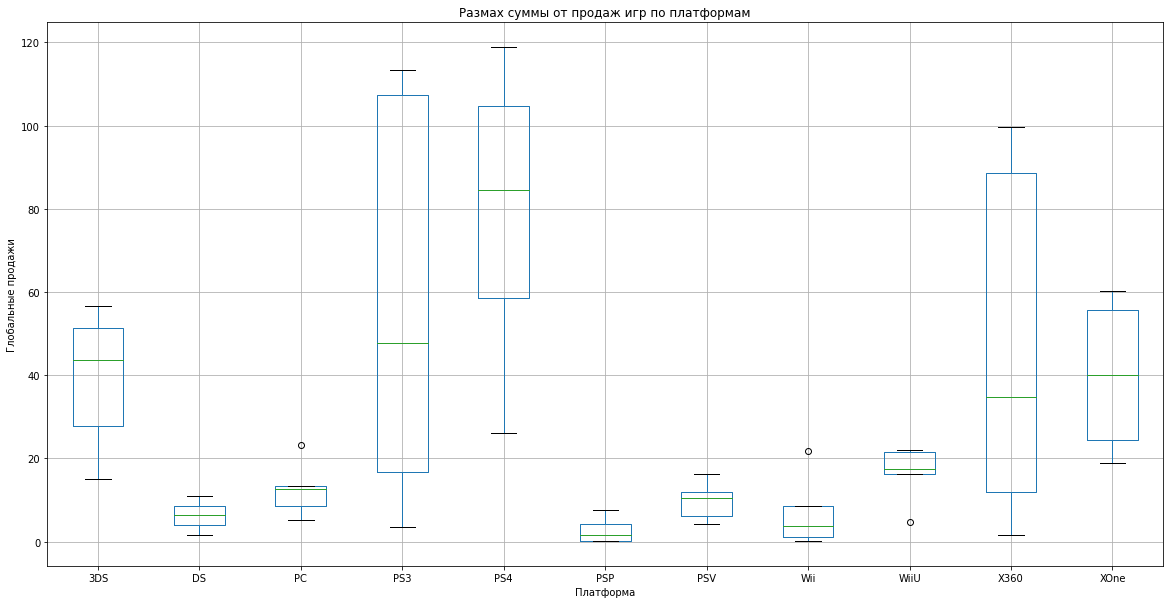

In [45]:
new_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').boxplot(figsize=(20, 10))
plt.title('Размах суммы от продаж игр по платформам')
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

Больше продаж за актуальный период совершается по уже выделенным раннее платформам: лидирует PlayStation, за ней следуют Xbox и 3DS от Nintendo. Подтврждается вывод о спаде в продажах платформ прошлого поколения - PS3 и X360, о чем свидетельскуют широкие "ящики с усами". Большой размах говорит о достижении пика и заметном сокращении продаж и продолжении сокращения. На данный момент наиболее сбалансированные относительно медианы платформы - PS4 и XOne.

#### Влияние оценок на продажи

In [46]:
#выдлим датафрейм, из которого уберем данные с 0, заменяющие пропуски
games_score = new_games.loc[(new_games['critic_score'] != 0) & (new_games['user_score'] != 0)]
games_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,call of duty: black ops ii,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16611,dragon ball z for kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16628,sébastien loeb rally evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16650,fast racing neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16658,prison architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,ND,0.01


Рассмотрим, как влияют на продажи оценки пользователей и критиков, на базе одной из платформ. Выберем платформу PS4, так как в актуальный период включены все данные о проданных играх, которыми мы располагаем на данный момент. 

In [47]:
#оценим корреляцию между оценкой и глобальными продажами
ps4 = games_score.query('platform == "PS4"')
print('Корреляция с оценкой критиков равна: ', ps4['critic_score'].corr(ps4['total_sales']))
print('Корреляция с оценкой пользователей равна:', ps4['user_score'].corr(ps4['total_sales']))

Корреляция с оценкой критиков равна:  0.40589480145836687
Корреляция с оценкой пользователей равна: -0.03362497596528878


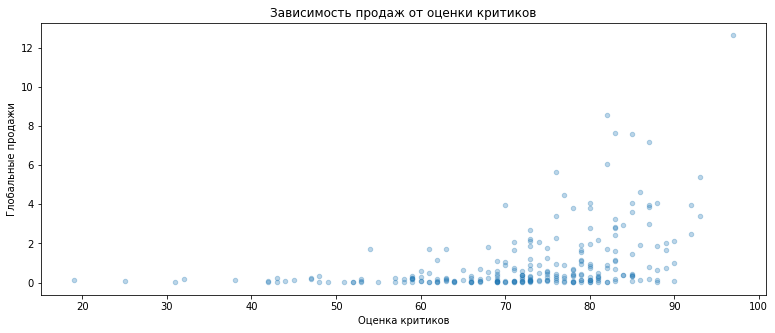

In [48]:
ps4.plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          title='Зависимость продаж от оценки критиков',
          xlabel='Оценка критиков',
          ylabel='Глобальные продажи',
          figsize=(13, 5),
          alpha=0.3);

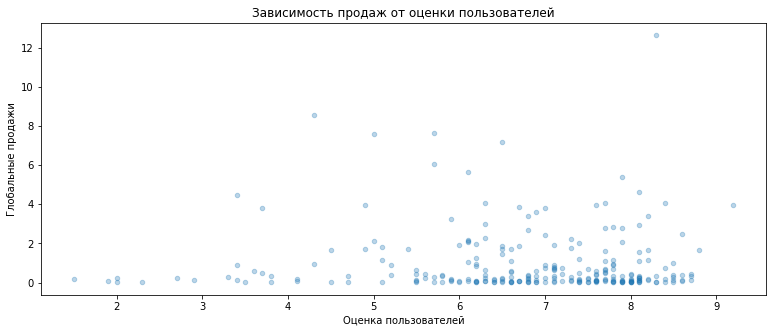

In [49]:
ps4.plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          title='Зависимость продаж от оценки пользователей',
          xlabel='Оценка пользователей',
          ylabel='Глобальные продажи',
          figsize=(13, 5),
          alpha=0.3);

In [50]:
#для дополнительного подтверждения оценим также корреляция по двум другим платформам
#посмотрим на платформы других двух компаний-лидеров индустрии
xone = games_score.query('platform == "XOne"')
print('Корреляция с оценкой критиков равна: ', xone['critic_score'].corr(xone['total_sales']))
print('Корреляция с оценкой пользователей равна:', xone['user_score'].corr(xone['total_sales']))

Корреляция с оценкой критиков равна:  0.41042203561296375
Корреляция с оценкой пользователей равна: -0.09400318326920852


In [51]:
ds3 = no_zero.query('platform == "3DS" and critic_score > 0 and user_score > 0')
print('Корреляция с оценкой критиков равна: ', ds3['critic_score'].corr(ds3['total_sales']))
print('Корреляция с оценкой пользователей равна:', ds3['user_score'].corr(ds3['total_sales']))

Корреляция с оценкой критиков равна:  0.33890386446332155
Корреляция с оценкой пользователей равна: 0.23208872237663558


- Корреляция с оценкой критикой оказалась средней и положительной, то есть на продажи оценки критиков могут повлиять в некоторой степени на продажи.
- Влияние оценок на платформы компаний Microsoft и Sony отличаются от влияния на продажи платформ компании Nintendo. В отличие от первых двух компаний, на которые оценки пользователей влияют в незначительной степени, данный показатель также оказывает влияние на продажи или в большей степени коррелирует с оценкой критиков. Возможно, продажи Nintendo в большей степени зависят от общественного мнения. Возможно, корреляция может объясниться распределением продаж в определенном регионе, в качестве гипотезы можно предположить, что платформы от Нинтендо более продаваемы в азиатском регионе, где мнение пользователей оказывает более сильное влияние, тогда как платформы других компаний распространены по всему миру или в западном регионе. 

In [52]:
#для дополнительного подтверждения посмотрим другую платформу от Нинтендо
wiiu = no_zero.query('platform == "WiiU" and critic_score > 0 and user_score > 0')
print('Корреляция с оценкой критиков равна: ', wiiu['critic_score'].corr(wiiu['total_sales']))
print('Корреляция с оценкой пользователей равна:', wiiu['user_score'].corr(wiiu['total_sales']))

Корреляция с оценкой критиков равна:  0.350882422488643
Корреляция с оценкой пользователей равна: 0.3918479505297129


- Таким образом, возможно, оценки пользователей Нинтендо в большей степени влияют на продажи, тогда как для платформ других компаний-лидеров мы не можем выделить такой зависимости. 

**Выводы для других платформ:**
(Эти предварительные выводы сделаны на основе неполных данных с неизвестным распределением оценок по регионам)
- Оценки критиков оказывают среднее положительное влияние на продажи игр на платформы во всех регионах.
- Оценки пользоваталей для платформ  компаний Sony и Microsoft практически не влияют на продажи, показатели отрицательные, то есть говорят о крайне слабой обратной зависимости. 
- На продажи игр для платформ компании Nintendo также влияют оценки пользователей, в некоторых случаях, как с WiiU, зависимость может быть даже более выраженная, чем в сравнении с оценкой критиков.

#### Жанры 

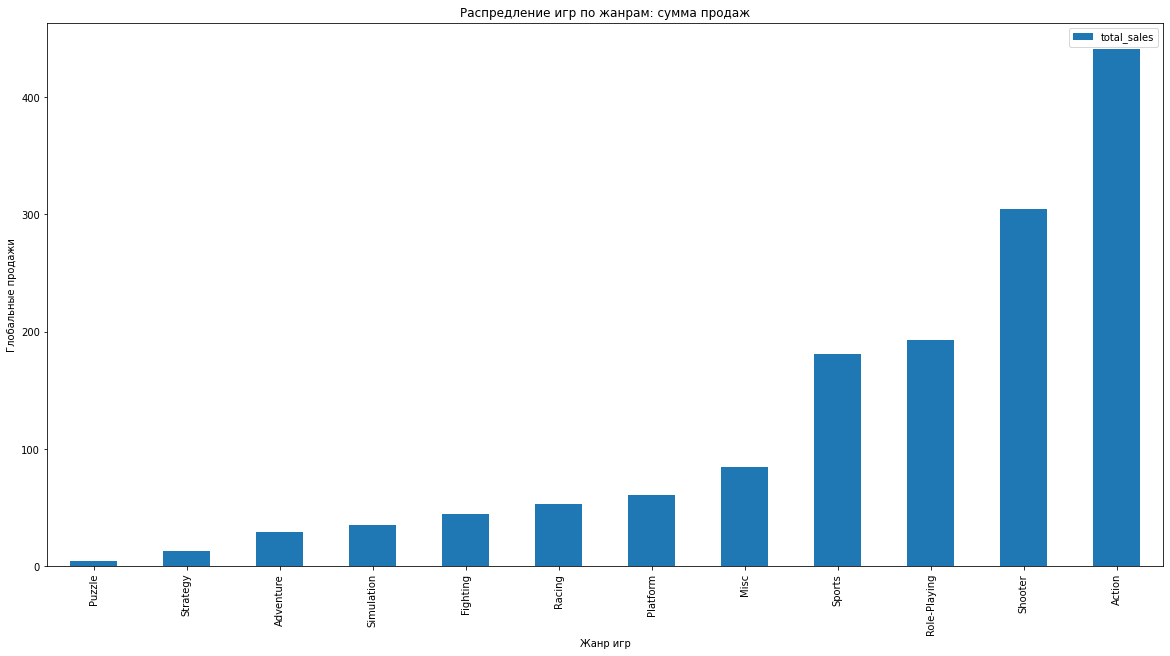

In [53]:
new_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='bar', figsize=(20, 10))
plt.title('Распредление игр по жанрам: сумма продаж')
plt.ylabel('Глобальные продажи')
plt.xlabel('Жанр игр')
plt.show()

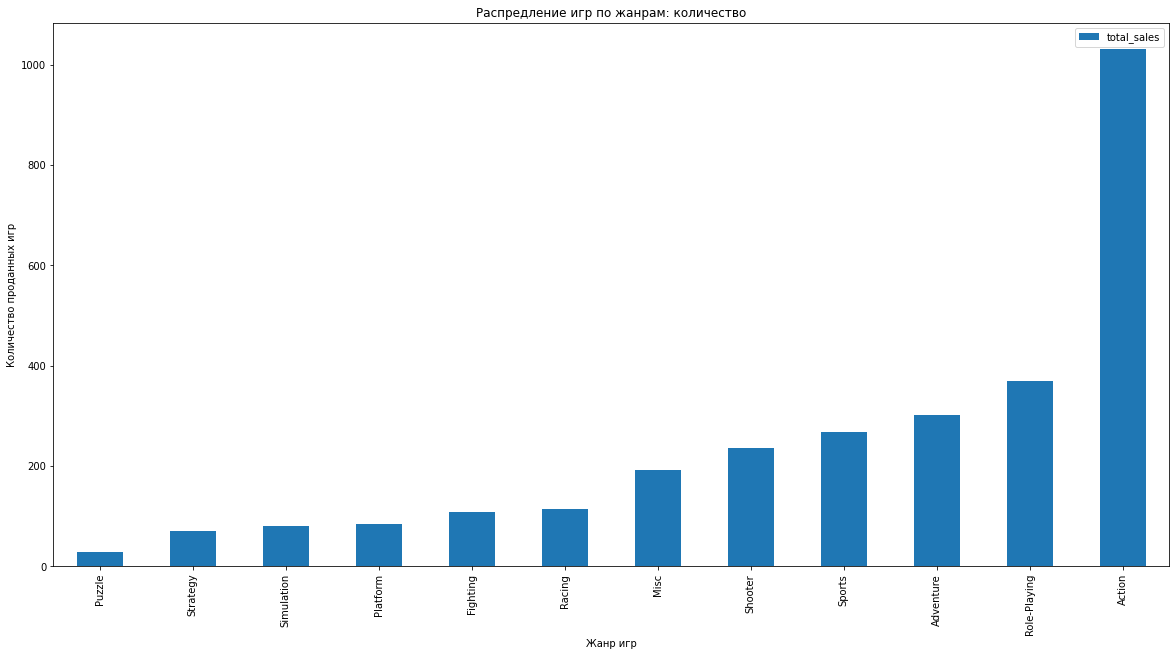

In [54]:
new_games.pivot_table(index='genre', values='total_sales', aggfunc='count').sort_values(by='total_sales').plot(kind='bar', figsize=(20, 10))
plt.title('Распредление игр по жанрам: количество')
plt.ylabel('Количество проданных игр')
plt.xlabel('Жанр игр')
plt.show()

Рассмотрим средние и медианные показатели продаж по каждому жанру:

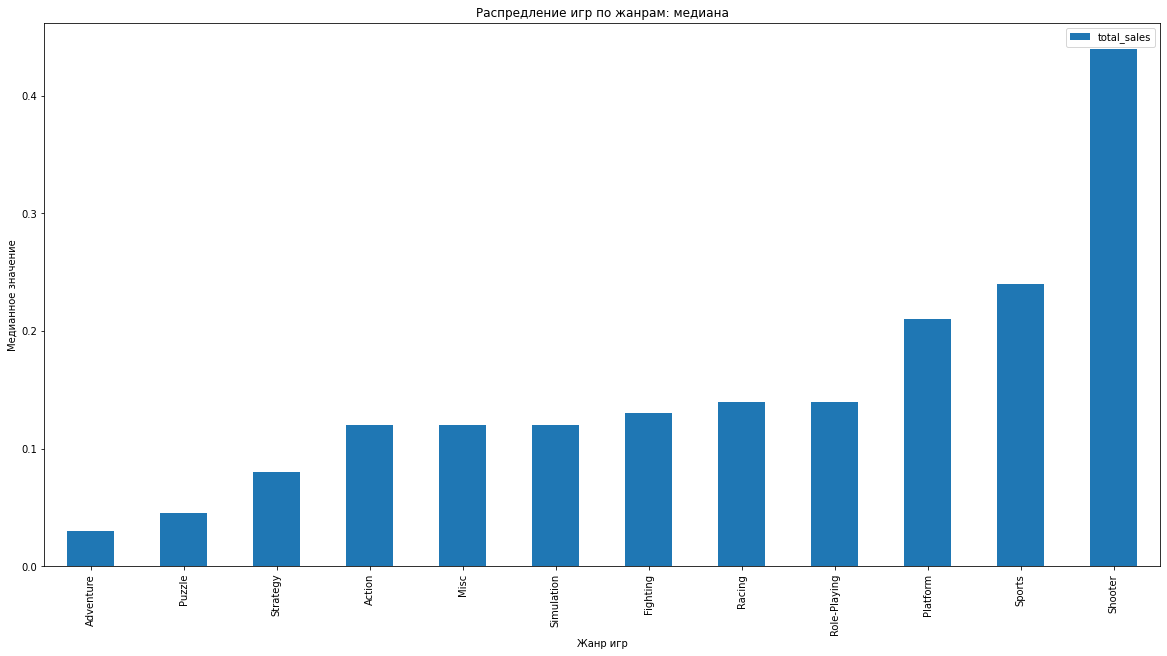

In [55]:

new_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales').plot(kind='bar', figsize=(20, 10))
plt.title('Распредление игр по жанрам: медиана')
plt.ylabel('Медианное значение')
plt.xlabel('Жанр игр')
plt.show()

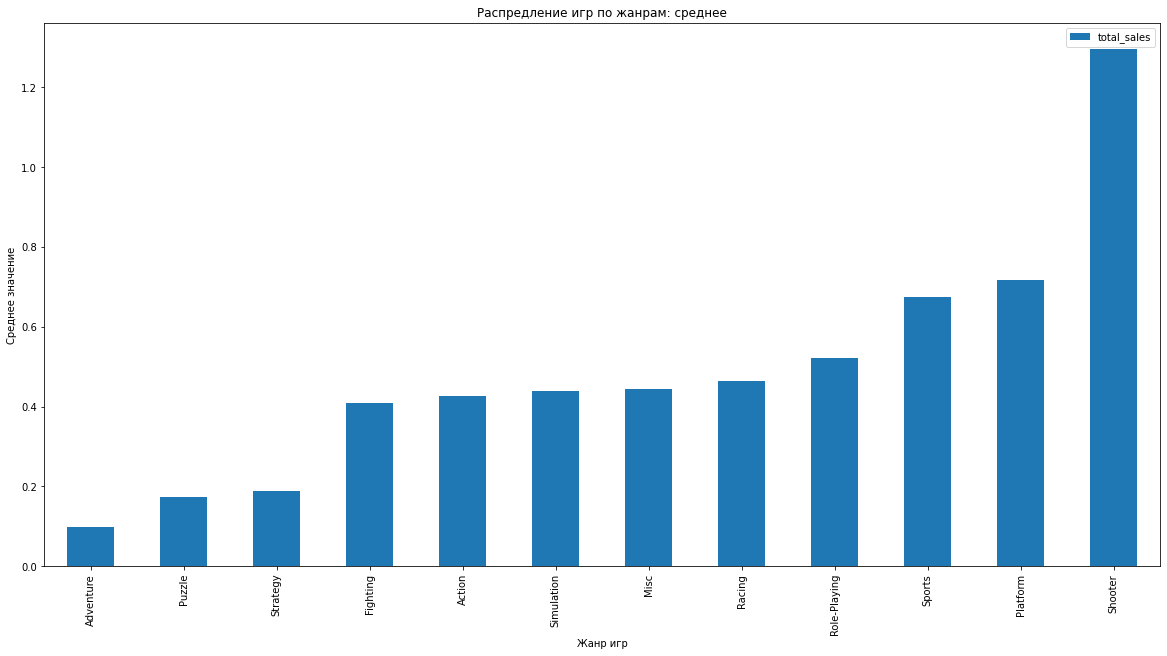

In [56]:
new_games.pivot_table(index='genre', values='total_sales').sort_values(by='total_sales').plot(kind='bar', figsize=(20, 10))
plt.title('Распредление игр по жанрам: среднее')
plt.ylabel('Среднее значение')
plt.xlabel('Жанр игр')
plt.show()

- Наиболее прибыльными суммарно жанрами являются экшн, шутеры и ролевые. Наименьшие суммы от продаж в жанрах стратегия, приключения и головоломки. 
- Топ-3 самых продаваемых игр по количеству экшн, ролевые и приключения. Игры шутеры по количеству на 5 месте, что означает, что данный жанр является дорогостоящим. К наименее продаваемым играм относятся игры жанра головоломки, стратегия и симуляторы. При этом игры жанра приключения находятся на 3 месте по продаваемости, что значит, что данный вид жанра не приносит много прибыли. 
- Так, количество проданных игр и продажи от них не всегда соотносятся в силу разноого ценообразования игр различных жанров: более дорогостоящие жанры требуют больших ресурсов на разработку геймплея, дизайна, рекламную кампанию.

Посмотрим на средние и медианные значение:
- Бесспорным лидером являются шутеры, также большие продажи обеспечивают платформеры и игры жанра спорт.
- Значительно от суммарных продаж отличаются средние показатели жанра экшн. Значит у игр этого жанра большой разброс показателей продаж.
- Наименьшие продажи как по средней, так и медиане обеспечивают жанры приключения, головоломки и стратегия.

**Вывод:**
- Индустрия компьютрных игр благодаря активному развитию технологий быстро меняется: своего пика она достигла в 2008-2009 гг, с 2012 начался период спада выпуска компьютерных игр в сравнении с предыдущим периодом. Причиной тому может быть появление альтернативных видеоигр, например, на смартфонах, монополизация рынка 3 крупными компаниями, производящими все популярные консоли - Nintendo, Sony, Miscrosoft, а также не эстенсивному, а интенсивному развитию игровой отрасли: более глубокая и сложная проработка игр, которая может приводить к удорожанию игр.
- Примерный срок жизни платформы составляет 7-9 лет. С среднем в год выходит по 1 новой платформе, однако, это показатель был расчитан за период с 1980-х года, когда лидеры индустрии еще не определились и на рынке существовало большее разнообразие платформ, на современном этапе ситуация изменилась, потому что игры в основном производят для платформ упомянутых компаний, а значит они определяют цикл жизни платформы и частоту выхода консоли нового поколения. Средний срок выпуска нового поколения платформы серии составляет около 6 лет, обычно новая платформа выпускает 2-3 года после начала спада в продажах консоли.
- Отдельной долгоиграющей платформой является ПК - продажи игр на данную платформу остаются стабильными с некоторым повышением в 2008-2011, когда количество выпускаемых игр достигло своего максимума, что может объясняться тем, что для игр, которые создавались для определенных консолей, выпускались версии для ПК.   
- Для анализа был выбран период 2012-2016, то есть с начала спада количества выпускаемых игр до сегодняшнего дня, чтобы можно было выделить самые актуальные тенденции даже несмотря на неполноту данных по нынешнему году. Этого же периода хватит, чтобы оценить изменяющиеся тренды.
- На 2016 год по продажам лидируют PS4, XOne и 3DS, то есть консоли от компаний-лидеров в отрасли, потенциально прибыльными платфорамами могут быть PS4, XOne, поскольку, вероятнее всего, данные платформы находятся еще на стадии роста или пика по продажам (необходимо потвердить в дальнейшем полными данными на 2016 год). Прибыльной также может быть и платформа 3DS и, в меньшей степени, WiiU. Продажи игр для ПК остаются примерно на одном уровне.
- Была выявлена средняя положительная зависимость продаж от оценки критиков, корреляция оценки пользователей и продаж отличается в зависимости от компании производителя консоли: для PS и Хbox зависимости не выявлено, тогда как для игр для платформ Nintendo - да. Этот вопрос можно подобнее изучить в дальнейшем: объясняется ли данная особенность регионом распространения платформ Нинтендо, политикой самой компании или другими факторами. Данный факт может оказаться важным при продумывании рекламной кампании игры.
- Наиболее прибыльными суммарно жанрами являются экшн, спорт и шутеры. При этом количество проданных игр шутеров меньше других лидирующих жанров, что означает дороговизну данного вида игр. Разработка таких игр наиболее дорогостоящая, так как требует больших творческих и технических ресурсов, отличается многообразием.
- Наименее прибыльными по суммарным показателям являются игры головоломки, приключения и стратегии, при этом игры-приключения находятся на 3 месте по количеству проданных игр, что указывает на их относитльную дешевизну. Наименьшее количеств игр продатся по жанрам головоломки, стратегии и симуляторы. Вероятнее всего, они отличаются меньшим разнообразием форм, по ним сложнее создать франшизы, требуют больше времени для прохождения и отличаются единообразным видом прохождния игры. 
- Лидерами по продажам являются жанры: шутеры, платформеры и спорт. Наименьший доход в среднем приносят жанры приключения, головоломки и стратегия.

<a id='fr'></a>
## Портрет пользователя по регионам

### Топ-5 популярных платформ

Популярность определяется суммой продаж, а не количеством проданных игр

In [52]:
print('Популярные платформы Северной Америки за 2012-2016')
display(new_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales'))
print('Популярные платформы Северной Америки за 2015-2016')
display(new_games.query('year_of_release == 2016 or year_of_release == 2015').pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales'))
print('Популярные платформы Северной Америки за 2016')
pl_na =new_games.query('year_of_release == 2016').pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
pl_na

Популярные платформы Северной Америки за 2012-2016


,na_sales
platform,
PSP,0.13
DS,4.59
PSV,10.98
Wii,17.45
PC,19.18
WiiU,38.10
3DS,55.31
XOne,93.12
PS3,103.38


Популярные платформы Северной Америки за 2015-2016


,na_sales
platform,
PSP,0.00
Wii,0.49
PSV,0.54
PC,3.72
PS3,5.66
X360,8.05
WiiU,8.86
3DS,10.31
XOne,50.30


Популярные платформы Северной Америки за 2016


,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36
X360,0.69
PS3,0.67
PSV,0.15
Wii,0.06


Как и в случае с общими продажами, видим, что с течением времени консоли прошлых поколений теряют в продажах, поэтому в дальнейшем будем исследовать данные по 2016 году как наиболее актуальные. 

In [53]:
games2016 = new_games.query('year_of_release == 2016')
games2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,ND,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16697,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,ND,0.01


In [54]:
pl_eu = games2016.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
pl_eu

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48
PS3,1.26
X360,0.71
PSV,0.39
Wii,0.11


In [55]:
pl_jp = games2016.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
pl_jp

,jp_sales
platform,
3DS,8.03
PS4,5.74
PSV,3.56
PS3,1.30
WiiU,0.67
XOne,0.01
PC,0.00
Wii,0.00
X360,0.00


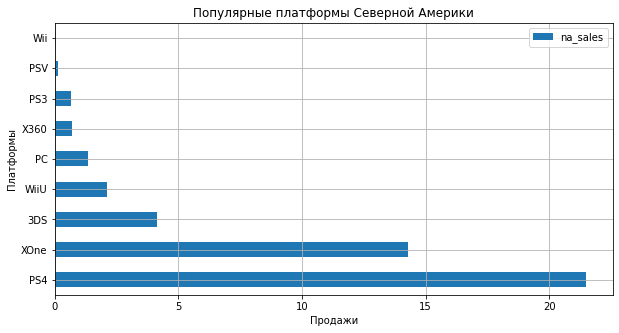

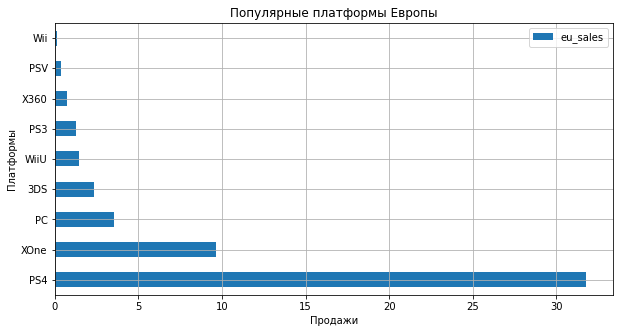

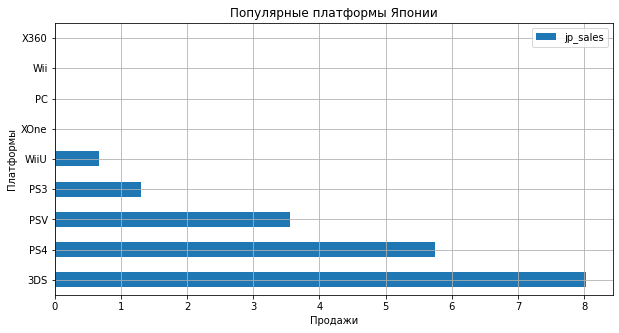

In [56]:
pl_na.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные платформы Северной Америки')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

pl_eu.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные платформы Европы')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

pl_jp.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные платформы Японии')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

- В Европе и Северной Америке совпадают наиболее популярные платформы: PS4, XOne, 3DS, WiiU, PC, различно только распределение продаж игр на них. В Европе большей популярностью пользуются игры на ПК, чем игры на консоли Нинтендо, тогда как в Северной Америке наоборот.
- В Японии на 2016 год популярными являются консоли отечественных производителей, то есть Sony и Nintendo, продолжают быть более популярными платформы прошлых поколений, тогда как игры на PC и платформы Microsoft не продаются. При этом наиболее популярной является консоль от Nintendo, вышедшая в 2011 году. Можно предположить, что рынок Японии более консервативный - переход к новым платформам проходит за больший срок, чем в западном мире.
- Возвращаясь к гипотезе о корреляции оценки пользователей и продажах, заметим, что частой характеристикой японских компаний является прежде всего ориентирование на внутренний рынок. Как видим на графиках, наибольшие продажи компании Нинтендо получает именно в Японии, тогда как продажи для платформ компании Sony значительно больше за рубежом. 
- Отметим отдельно, что сравнение показателей неравномерное, поскольку Европа и Северная Америка являются двумя крупными регионами, тогда как Япония - страна, значит соотношение данных, возможно, несоразмерно. Исследование можно расширить до региона Восточная Азия.

In [57]:
#определим доли продаж
pl_sales = games2016.groupby('platform').agg({'na_sales':'sum', 'eu_sales': 'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})
pl_sales['na_share'] = round((pl_sales['na_sales'] / pl_sales['total_sales']) * 100, 2)
pl_sales['eu_share'] = round((pl_sales['eu_sales'] / pl_sales['total_sales']) * 100, 2)
pl_sales['jp_share'] = round((pl_sales['jp_sales'] / pl_sales['total_sales']) * 100, 2)
pl_sales['other_share'] = round((pl_sales['other_sales'] / pl_sales['total_sales']) * 100, 2)
pl_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_share,eu_share,jp_share,other_share
platform,,,,,,,,,
3DS,4.14,2.33,8.03,0.64,15.14,27.34,15.39,53.04,4.23
PC,1.36,3.53,0.00,0.36,5.25,25.90,67.24,0.00,6.86
PS3,0.67,1.26,1.30,0.37,3.60,18.61,35.00,36.11,10.28
PS4,21.49,31.78,5.74,10.24,69.25,31.03,45.89,8.29,14.79
PSV,0.15,0.39,3.56,0.15,4.25,3.53,9.18,83.76,3.53
Wii,0.06,0.11,0.00,0.01,0.18,33.33,61.11,0.00,5.56
WiiU,2.10,1.48,0.67,0.35,4.60,45.65,32.17,14.57,7.61
X360,0.69,0.71,0.00,0.12,1.52,45.39,46.71,0.00,7.89
XOne,14.27,9.63,0.01,2.24,26.15,54.57,36.83,0.04,8.57


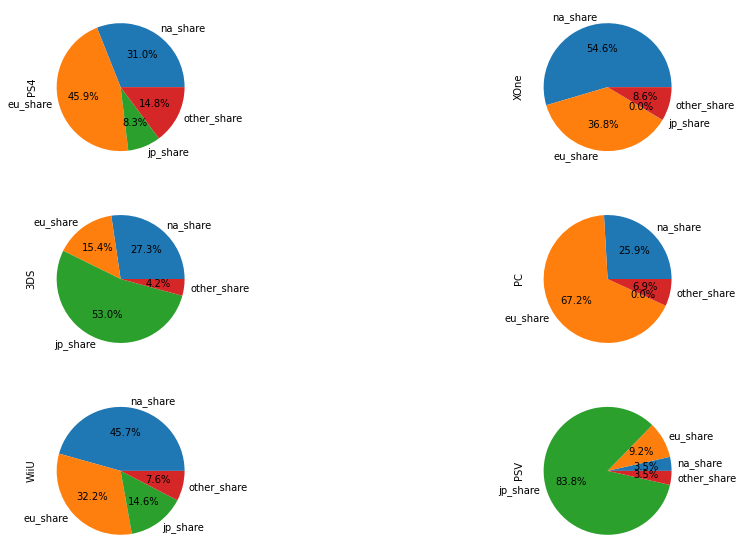

In [58]:
#визуализируем данные
fig, axis = plt.subplots(3,2, figsize=(16,10))
pl_sales.loc['PS4', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[0,0]);
pl_sales.loc['XOne', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[0,1]);
pl_sales.loc['3DS', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[1,0]);
pl_sales.loc['PC', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[1,1]);
pl_sales.loc['WiiU', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[2,0]);
pl_sales.loc['PSV', ['na_share', 'eu_share', 'jp_share', 'other_share']].plot.pie(autopct='%1.1f%%', ax=axis[2,1]);

- Япония лидирует в продажах игр для консолей предыдущих поколений (PSV, PS3), а также игр для 3DS.
- В Европе в сравнении с остальными регионами наиболее популярны игры для ПК, PS4 активнее всего продается в этом регионе.
- Северная Америка занимает перое место в продажах XOne, a также WiiU.

### Топ-5 популярных жанров

Популярность определяется суммой продаж, а не количеством проданных игр

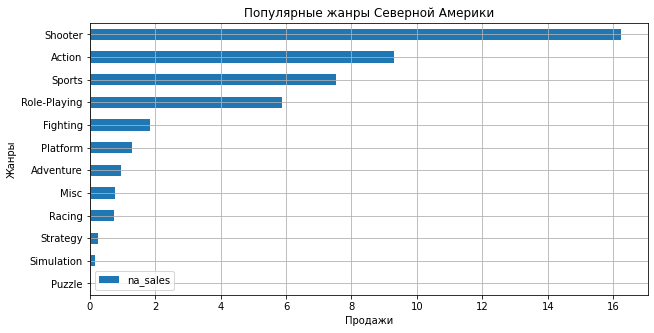

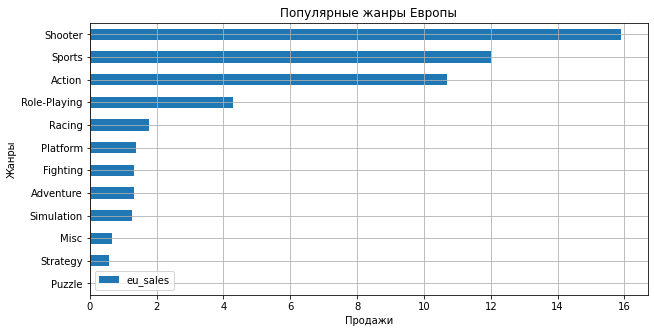

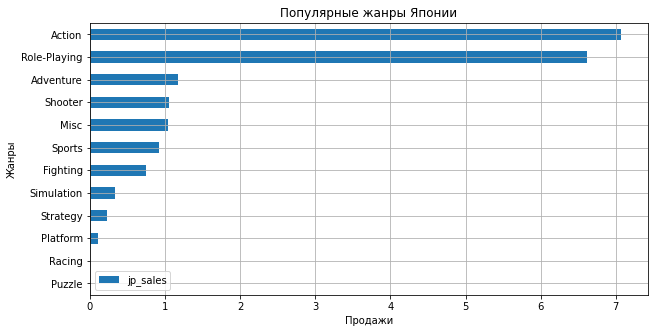

In [59]:
#визуализируем распределение жанров по странам
gr_na = games2016.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales')
gr_eu = games2016.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales')
gr_jp = games2016.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')

gr_na.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные жанры Северной Америки')
plt.ylabel('Жанры')
plt.xlabel('Продажи')
plt.show()

gr_eu.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные жанры Европы')
plt.ylabel('Жанры')
plt.xlabel('Продажи')
plt.show()

gr_jp.plot(kind='barh', figsize=(10, 5), grid=True, title='Популярные жанры Японии')
plt.ylabel('Жанры')
plt.xlabel('Продажи')
plt.show()

- Как и в случае с платформами, предпочтения в Европе и Северной Америке более сходны, чем с Японией. В западном мире популярны такие жанры как шутеры, экшн, спорт и ролевые. Отличительными жанрами являются файтинг у СА и гонки в Европе. При этом игры жанра спорт в Европе примерно в 2 раза популярнее, чем в СА. Шутеры являются безоговорочными лидерами в обоих регионах. 
- Популярные жанры Японии сильнее отличаются от портрета Европы и СА, в стране наиболее популярны игры экш и ролевые игры, которые также были в топ-5 в других регионах, но на других позициях, в Японии также часто играют в шутеры, но они значительно менее популярны, учитывая также, что мы определили, что шутеры более дорогие игры, можно предположить, что игры данного жанра даже менее популярны, чем это отражено на графике, тогда как более дешевые игры-приключения чаще продаются, хотя и не приносят такую же выручку. В Японии также популярны игры жанра "другие/разное".
- Отличия в распределении жанров могут объясняться культурными особенностями, менталитетом, например, меньшей культурой индивидуализма и, как следствие, состязательностью японцев.

### Влияние рейтинга ESRB

 Ориентариция на рейтинг и его влияние на продажи не является быстро изменяющиейся тенденцией, поэтому мы можем рассмотреть данные не только за 2016, но за весь актуальный период 2012-2016.

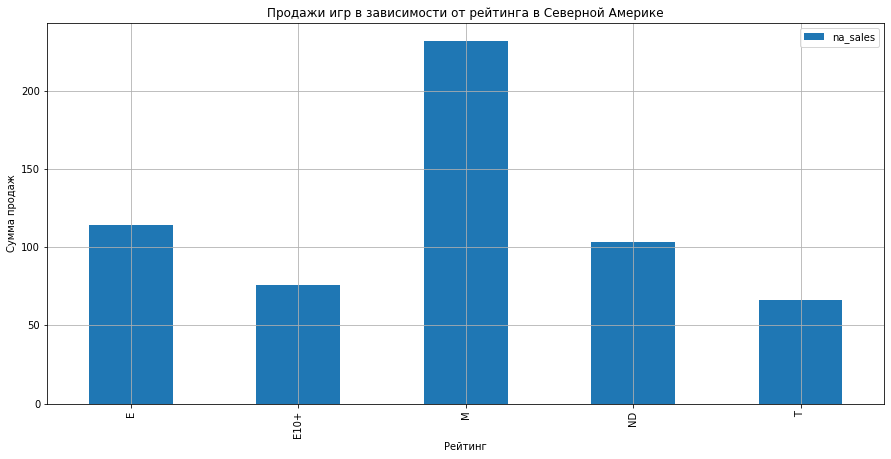

In [60]:
new_games.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 7), title='Продажи игр в зависимости от рейтинга в Северной Америке')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.show()

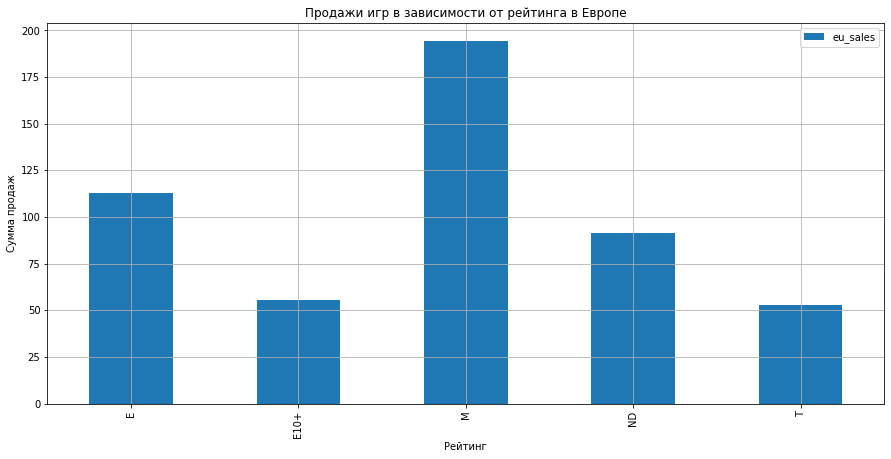

In [61]:
new_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 7), title='Продажи игр в зависимости от рейтинга в Европе')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.show()

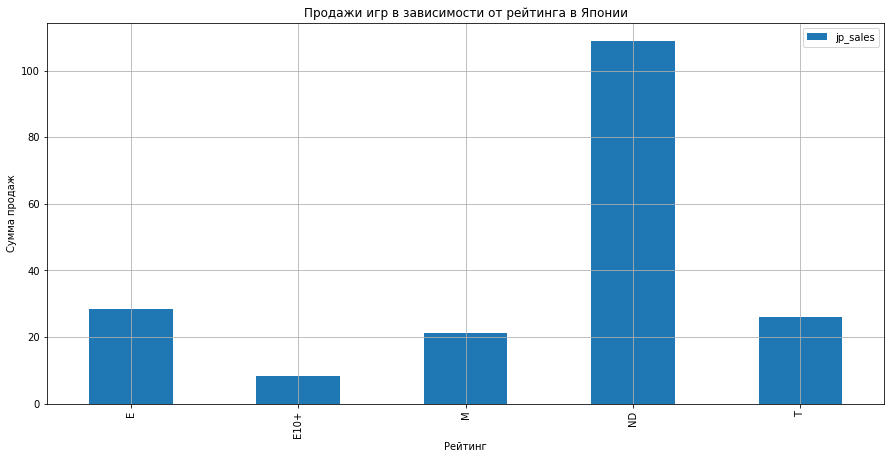

In [62]:
new_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(15, 7), title='Продажи игр в зависимости от рейтинга в Японии')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг')
plt.show()

- Продаваемых игр без рейтинг (ND) в Японии значительно больше, чем остальных, что означает, что рейтинг ESRB не оказывает влияния на продажи в стране. Это и логично, поскольку ESRB является американской ассоциацией, тогда как в Японии дейтсует своя рейтинговая организация, которая определяет возрастные ограничения.
- Распределение игр по рейтингу в СА и Европе более равномерно. Это может объясняться тем, что большее число покупаемых игр было отправлено в ESRB для получения оценки, так как данная ассоциация является основной в США и оказывает влияние на другие страны СА и на Европу. 

**Вывод:**
Портреты основаны на данных за 2016 г.

<u>Сходства Серевной Америки и Европы:</u>

- Наиболее популярные платформы: PS4, XOne, 3DS, WiiU, PC
- Наиболее популярные жанры: шутеры, экшн, спорт и ролевые
- Игры в основном помечаются рейтингом ESRB, наиболее продаваемыми являются игры для взрослых(17+, М).

<u>Различия:</u>

*Портрет Серевной Америки*
- Наименее из популярных платформ - ПК, перед ней расположены консоли от Нинтендо.
- Является регионом, в котором наиболее популярны игры на XOne.
- Популярным жанром является файтинг (борьба).

*Портрет Европы*
- ПК является 3 по популярности платформйой, за ней следуют консоли Нинтендо.
- Является регионом, в котором наиболее популярны игры на ПК.
- Популярным жанром являются гонки.
- Жанр спорт примерно в 2 раза популярнее, чем в СА.

*Портрет Японии*
- Пользователи предпочитают платформы японских компаний: 3DS, PS4, PS3, PSV, WiiU
- Консоли прошлых поколений до сих пор находятся в топ-5 в продажах (PSV, PS3), что означает, что цикл жизни платформы в Японии больше, чем в западных странах.
- Является регионом, в котором наиболее популярны игры на 3DS.
- Игры на ПК не являются востребованными.
- Популярные жанры: экшн, ролевые, приключения, шутеры, разное
- Рейтинг ESRB не оказывает особого влияния на продажи, так как в стране есть своя организация, определяющая возрастную категорию.

В дальнейшем можно проверить гипотезу ориентирован ли больше Нинтендо на внутренний рынок и действительно ли зависит больше других компаний-лидеров от оценок пользователей. 

Отдельно хотелось бы отметить несоразмерность сравнения двух регионов с одной страной. Для большей полноты исследования можно выделить регион Восточной Азии, который бы включал Японию или его часть без Китая из-за схожих культурных особенностей и, возможно, покупательском поведении и предпочтениях в сфере игр.

<a id='fi'></a>
## Проверка гипотез

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для исследования выберем наиболее свежие данные: 2015-2016 гг. Здесь мы сравниваем две независимые друг от друга выборки, нулевой гипотезой является гипотеза равенства оценки, для ее отвержения мы установили порог в 5%, если средние будут схожи меньше, чем на 5%, то мы можем отвергнуть предположение о равенстве оценок платформ. Проверка двусторонняя, так как нам важно оценить равенство, а не наличие скоса.

In [63]:
xone = games_score.loc[(games_score['year_of_release'] > 2014) & (games_score['platform'] == "XOne"), 'user_score']
pc = games_score.loc[(games_score['year_of_release'] > 2014) & (games_score['platform'] == "PC"), 'user_score']

alpha = .05

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.3280257221394691
Не получилось отвергнуть нулевую гипотезу


Гипотезу отвергнуть не получилось, значит факт равенства средних значений рейтингов пользователей Xbox One и PC остается вероятным, что означает, что пользователи одинаково хорошо или плохо оценивают игры на данные платформы. 

Тем не менее, предоставленная к проверке гипотеза не помогает принять решения при продумывании рекламной кампании, так как оценка пользователей по предварительному анализу влияет на продажи платформ от компании Нинтендо, к которым Xbox One и PC не относятся, но данный факт стоит подтвердить дальнейшим исследованием и, возможно, сформулировать новую гипотезу для проверки на основе новых данных. 

**H0:** Средние пользовательские рейтинги жанров Action и Sports равны.

**H1:** Средние пользовательские рейтинги жанров Action и Sports не равны.

Сделаем аналогичным первой проверке данный тест.

In [64]:
action = games_score.loc[(games_score['year_of_release'] > 2014) & (games_score['genre'] == "Action"), 'user_score']
sports = games_score.loc[(games_score['year_of_release'] > 2014) & (games_score['genre'] == "Sports"), 'user_score']

alpha = .05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.5087325539494814e-07
Отвергаем нулевую гипотезу


Проверка гипотезы за период 2015-2016, а также за более ранние периоды дают результат, в котором нулевая гипотеза отвергается. Проверим только 2016 год.

In [65]:
action = games_score.loc[(games_score['year_of_release'] > 2015) & (games_score['genre'] == "Action"), 'user_score']
sports = games_score.loc[(games_score['year_of_release'] > 2015) & (games_score['genre'] == "Sports"), 'user_score']

alpha = .05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08219220986473635
Не получилось отвергнуть нулевую гипотезу


На основе данных только за 2016 год не удалось отвергнуть гипотезу о равенстве рейтингов пользователей по жанрам экшн и спорт, тогда как предыдущие периоды отвергали данную гипотезу. Возможно, на данном этапе мы наблюдаем новую тенденцию в предпочениях пользователей: игры жанра спорт стали оценивать так же, как и экшн. Также возможно, что в будущем равенство будет отвергнуто, так как нынешняя оценка дается на основе неполных данных за 2016 года.

<a id='six'></a>
## Вывод

*Предобработка данных*
- Названия столбцов датафрейма были приведены к стандартному виду. 
- Было обнаружено множество пропусков, наличие которых может объясняться тем, что информация была взята из отрытого доступа и могла быть неполной, возможно, ее было тяжело считать или произошел сбой при загрузке/выгрузке. Пропуски были заменены на 0 в качестве указателей на пропуски, в столбце с рейтингом пропуски были заменены на значение "не определен"(ND). 
- Был изменен тип данных в столбцах с годом и оценкой пользователей на числовой (целый и веществнный соответственно). 
- Проверка на дубликаты в названии игры показало, что строки с одинаковыми названиями соответствуют разным версиям игры для разных платформ и разных годов выпуска.
- Был создан новый столбец с полной суммой продаж.

*Закономерности для определения успешной игры (определить популярный продукт, продумать рекламную кампанию)*
- Рынок компьютерных игр является быстроменяющимся, на данный момент индустрия развивается интенсивно: сократилось количество выпускаемых игр и усложняются их характеристики, что может приводить к повышению цены за продукт, также определились лидеры индустрии, которые выпускают новые поколения платформ и конкурируют между собой: Sony с платформами PlaySation, Miscrosoft с различными поколениями Xbox и Nintendo с консолями Wii, DS.
- Примерный срок жизни платформы составляет 7-9 лет, а новые поколения платформ одной серии выпускаются в среднем раз в 6 лет, обычно спустя 2-3 после начала спада в продажах по консоли предыдущего поколения.
- Наиболее перспективными платформами на сегодня являются PS4, XOne. Японский рынок сильно выделяется в сравнении с рынком регионов Северной Америки и Европы, он отличается большей консервативностью: преданностью платформам отечественных компаний и большим сроком их эксплуатации, то есть, когда в западном мире продажи по платформам предыдущих поколений идут на спад, в Японии они еще остаются популярными и приносят прибыль (как в случае с PS3 и PSV на 2016). Поэтому перспективной может быть и платформа 3DS, особенно в контексте Японии, так как именно в этой стане данная платформа наиболее популярна, более 50% продаж игр на эту консоль приходятся на Японию. 
- ПК остается востребованной и стабильной платформой на протяжении десятилений, продажи игр для этой платформы не отличались сильными спадами или подъмами, на данный момент наиболее игры для ПК наиболее популярны в Европе и совсем оставлены без внимания в Японии.
- Оценка критиков влияет на продажи в средней степени, значит важно при продумывании рекламной компании оценивать этот фактор. Оценки пользователей пока коррелируют только с продажами платформы Нинтендо (предварительная гипотеза), что следует исследовать в дальнейшем. Вероятна перспектива роста влияния оценки пользователей в связи с большим распространением феномена блогеров и инфлуэнсеров. 
- Шутеры наиболее дорогой жанр игр. Лидерами по продажам являются жанры: шутеры, платформеры и спорт. Шутеры наиболее дорогой жанр игр. 
- По количеству и суммарным продажем кажется, что игры жанра экшн также прибыльны, но средние показатели продаж указывают на обратное, что означает, что в данном жанре игр велик разброс цен и дохода.
- К наименее прибыльным относятся игры головоломки, приключения и стратегии, при этом игры-приключения находятся на 3 месте по количеству проданных игр, что указывает на их относитльную дешевизну. Наименьшее количеств игр продатся по жанрам головоломки, стратегии и симулятор.
- Наиболее продаваемые игры для взрослых рейтинга М.

*Портрет пользователя по регионам*

СА:

- Топ-5 платформ: PS4, XOne, 3DS, WiiU, PC
- Топ-5 жанров: шутеры, экшн, спорт, ролевые, файтинг
- Рейтинг ESRB влияет

Европа:

- Топ-5 платформ: PS4, XOne, PC, 3DS, WiiU
- Топ-5 жанров: шутеры, спорт, экшн, ролевые, гонки
- Рейтинг ESRB оказывает влияние, но есть также свой рейтинг от ЕС

Япония:

- Топ-5 платформ: 3DS, PS4, PSV, PS3, WiiU
- Топ-5 жанров: экшн, ролевые, приключения, шутеры, разное
- Рейтинг ESRB незначительно влияет, есть свой рейтинг

*Выводы по гипотезам:*
- Нулевую гипотезу о равенстве средней оценки пользователей платформ Xbox One и PC не получилось отвергнуть на протяжении всего периода, с которого существует Xbox One. Что означает, что пользователи все время оценивали схожим образом игры на обе платформы.
- Нулевую гипотезу не удалось отвергнуть только на основе данных за 2016 год, предыдущие показатели приводили к отвержению равенства оценок пользователей по жанрам экшн и спорт. То есть это может свидетельствовать о новой тенденции, начинающейся в 2016 году: пользователи стали одинаково оценивать игры данных жанров. Однако для большей уверенности стоит подтвердить эту гипотезу на более полных данных по 2016 году, когда они станут доступны.

*Рекомендации:*
- Во время обзора данных было обнаружено, что существует ряд игр, которые значительно первосходят другие в продажах, в дополнение к проведенному общему анализу можно в дальнейшм изучить подробнее маленькую выборку наиболее успешных игр и выделить объдиняющие их критерии в глобальном и региональном срезе.
- В данном исследовании сравниваются продажи двух крупных регионов - Северной Америки и Европы с Японией - страной. В дальнейшем для полноты исследования можно предложить оценивать данные по региону Восточной Азии, поскольку поведение и предпочтения пользователей могут быть схожи, и это поможет создать более полную картину для анализа и подтверждения гипотез.
- Исследовать гипотезу: действительно ли на игры платформ Nintendo оказывает влияние оценка пользователей, или оценка пользователей оказывает влияние на игры, которые были выпущены специально для Японии, а наиболее продаваемы платформы Нинтендо именно в Японии.  